# Optimal control transport of trapped ions 
Transport of trapped ions is a key tool in trapped ion experiments. The task of moving one ion from A to B in the trap can be split into a series of interconnected optimization problems.

Reference: Optimal control transport of neutral atoms in optical tweezers at finite temperature, 
https://doi.org/10.1103/PhysRevResearch.6.033282

1. Reproduce the optimal control transport task discussed in the paper for the case of trapped ions. Formulate the problem as the 1D transport of one particle in a harmonic potential (rather than gaussian) and find a trajectory with minimal excitation using realistic trap parameters. You can use the python package referenced in the paper https://pypi.org/project/quocs-lib/ <br>
Bonus: transport two ions, use two control parameters (position and trap frequency), and minimize the excitation of both the COM and STR mode. 
2. Implement the transport in a realistic ion trap. Build an electrostatic model for a surface electrode trap, and find the voltage waveforms that reproduce the optimal control trajectory. I suggest using the python package pytrans https://pypi.org/project/pytrans/ (and related 
examples) 

By the due date please submit the presentation and the code. The final presentation will be 20 minutes long and you have to present the problem, methods and results. A final question on the program of the Quantum Information and Computing course will conclude the exam.

**Import zone**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qho_time_evolution import Param, Operators
from optimization import OptimalControl

In [12]:
# SIMULATION PARAMETERS

xmin = -300.0
xmax = 300.0
num_x = 10000
tsim = 200
tc = 10
desired_dt = 0.1
num_t = int(tsim/desired_dt)
num_tc = int(tc/desired_dt)
im_time = False

# Initialize the Param object
par = Param(xmin, xmax, num_x, tsim, num_t, tc, num_tc, im_time)

# ===========================================================================================================

# INITIAL CONDITIONS -> ADD WFC OFFSET

res = num_x
omega = 1.0
num_wfcs = 4
T = 1
linear_pulse = lambda t: t
times = np.linspace(0, tsim, num_t) - 100
pulse = linear_pulse(times)

# Initialize the Operators object
opr = Operators(res, omega, num_wfcs, T, pulse, par)

In [13]:
opr.rho

array([[0.6439, 0.    , 0.    , 0.    ],
       [0.    , 0.2369, 0.    , 0.    ],
       [0.    , 0.    , 0.0871, 0.    ],
       [0.    , 0.    , 0.    , 0.0321]])

In [14]:
print("Energies\n", opr.energies)

Energies
 [0.5000000000000002, 1.4999999999999996, 2.499999999999999, 3.5000000000000027]


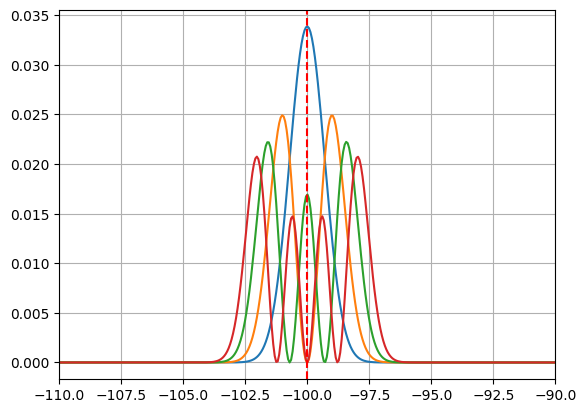

In [15]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)
  
plt.axvline(opr.r_t[0], color='red', linestyle='--')
plt.xlim(opr.r_t[0] - 10, opr.r_t[0] + 10)
plt.grid()
plt.show()

In [16]:
opr.infidelity()

0.001

In [17]:
opr.time_evolution(par, fixed_potential=False)

In [18]:
opr.rho

array([[ 0.4905+0.j    , -0.1988-0.1061j,  0.0408+0.0603j,
        -0.0022-0.0195j],
       [-0.1988+0.1061j,  0.2833+0.j    , -0.1343-0.0715j,
         0.0305+0.0449j],
       [ 0.0408-0.0603j, -0.1343+0.0715j,  0.1502+0.j    ,
        -0.0785-0.0417j],
       [-0.0022+0.0195j,  0.0305-0.0449j, -0.0785+0.0417j,
         0.0761+0.j    ]])

In [19]:
print("Energies\n", opr.energies)

Energies
 [1.0276256514514281, 2.027627807904062, 3.027629964356683, 4.0276321208093]


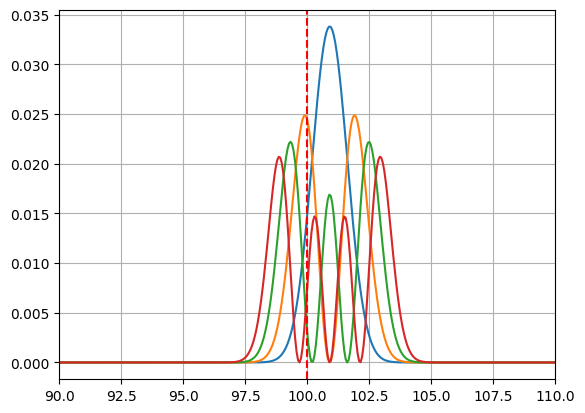

In [20]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.xlim(opr.r_t[-1] - 10, opr.r_t[-1] + 10)

plt.grid()
plt.show()

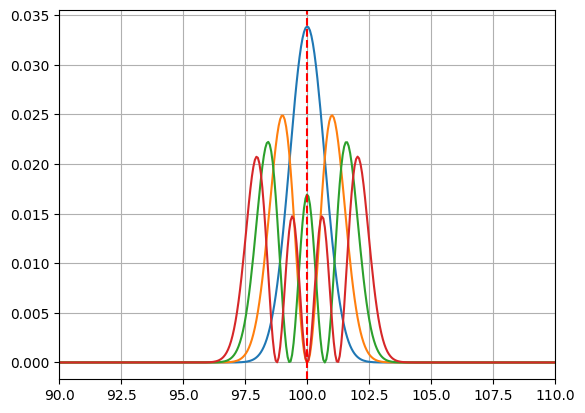

In [21]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.shifted_wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.xlim(opr.r_t[-1] - 10, opr.r_t[-1] + 10)
plt.grid()
plt.show()

In [22]:
opr.infidelity()

0.19287839399046834648

In [23]:
opr.time_evolution(par, fixed_potential=True)

In [24]:
opr.rho

array([[ 0.4904+0.j    , -0.1989-0.1059j,  0.0408+0.0603j,
        -0.0021-0.0195j],
       [-0.1989+0.1059j,  0.2833+0.j    , -0.1343-0.0714j,
         0.0304+0.0449j],
       [ 0.0408-0.0603j, -0.1343+0.0714j,  0.1502+0.j    ,
        -0.0785-0.0418j],
       [-0.0021+0.0195j,  0.0304-0.0449j, -0.0785+0.0418j,
         0.0761+0.j    ]])

In [25]:
print("Energies\n", opr.energies)

Energies
 [1.0279056131233546, 2.0279060862067966, 3.027906559290231, 4.027907032373663]


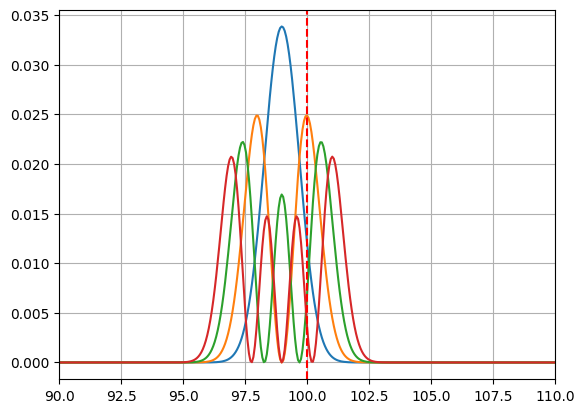

In [26]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.xlim(opr.r_t[-1] - 10, opr.r_t[-1] + 10)
plt.grid()
plt.show()

In [27]:
opr.infidelity()

0.19304033495952356526

In [28]:
opr.average_infidelity

0.19287320396767252835

In [135]:
# SIMULATION PARAMETERS

xmin = -5.0
xmax = 5.0
num_x = 5000
tsim = 5
tc = 10
desired_dt = 0.1
num_t = int(tsim/desired_dt)
num_tc = int(tc/desired_dt)
im_time = False

# Initialize the Param object
par = Param(xmin, xmax, num_x, tsim, num_t, tc, num_tc, im_time)

# ===========================================================================================================

# INITIAL CONDITIONS

res = num_x
omega = 1.0
num_wfcs = 8
T = 1
linear_pulse = lambda t: t / tsim
times = np.linspace(0, tsim, num_t)
pulse = linear_pulse(times)

# Initialize the Operators object
opr = Operators(res, omega, num_wfcs, T, pulse, par)

In [136]:
optimization_dictionary = {"optimization_client_name": "OptimalControldCRAB"}
optimization_dictionary["algorithm_settings"] = { "algorithm_name": "dCRAB"}
optimization_dictionary["algorithm_settings"]["optimization_direction"] = "minimization"
optimization_dictionary["algorithm_settings"]["super_iteration_number"] = 3
optimization_dictionary["algorithm_settings"]["max_eval_total"] = 5000

dsm_settings = {
        "general_settings": {
            "dsm_algorithm_name": "NelderMead",
            "is_adaptive": False
        },
        "stopping_criteria": {
            "xatol": 1e-4,
            "fatol": 1e-6,
            "change_based_stop": {
                "cbs_funct_evals": 200,
                "cbs_change": 0.01
            }
        }
    }
    
optimization_dictionary["algorithm_settings"]["dsm_settings"] = dsm_settings


pulse_x = {"pulse_name": "Pulse_1",
           "upper_limit": 100.0,
           "lower_limit": -100.0,
           "bins_number": 2000,
           "amplitude_variation": 30,
           "time_name": "time_1"}
           
#pulse_x["scaling_function"] = {
#               "function_type": "python_file",
#               "file_path": "functions",
#               "function_name": "shape_function",
#               "path_mode": "relative"
#             }

pulse_x["initial_guess"] = {
               "function_type": "python_file",
               "file_path": "functions",
               "function_name": "initial_guess_function",
               "path_mode": "relative"
             }


pulse_x["basis"] = {
                "basis_name": "Fourier",
                "basis_vector_number": 2,
                "random_super_parameter_distribution": {
                    "distribution_name": "Uniform",
                    "lower_limit": 0.01,
                    "upper_limit": 20.0
                }
            }

#pulse_x["basis"] = {"basis_name": "PiecewiseBasis"}

#pulse_x["basis"] = {
#  "basis_name": "Fourier",
#  "basis_vector_number": 5,  # Adjust based on resolution needs
#  "random_super_parameter_distribution": {
#    "distribution_name": "Uniform",
#    "lower_limit": 0.01,
#    "upper_limit": 5.0
#  }
#}


time1 = {"time_name": "time_1",
         "initial_value": 5.0 }

optimization_dictionary["pulses"] = [pulse_x]
optimization_dictionary["parameters"] = []
optimization_dictionary["times"] = [time1]
optimization_dictionary["shaping_options"] = [
            "add_base_pulse",
            "add_new_update_pulse",
            #"scale_pulse",
            "add_initial_guess",
            "limit_pulse"
        ]


from quocslib.Optimizer import Optimizer
import time

optimization_obj = Optimizer(optimization_dictionary, OptimalControl(opr, par))

time1 = time.time()
optimization_obj.execute()
time2 = time.time()
print("The optimization took {seconds} seconds".format(seconds=time2 - time1))

INFO     oc_logger    The optimization direction is minimization
INFO     oc_logger    QuOCS version number: 0.0.63


INFO     oc_logger    Direct search start time has been reset.
[0.566810529426004, 1.5987762307233258, 2.7876900521565715, 4.525658758546257, 7.917606376264402, 14.74323929855986, 21.260416248532973, 19.294019788277613]
INFO     oc_logger    New record achieved. Previous FoM: 10000000000, new best FoM : 0.04734807967027382
INFO     oc_logger    Function evaluation number: 1, SI: 1, Sub-iteration number: 0, FoM: 0.04734807967027382


/tmp/ipykernel_442/2718060526.py:51: RuntimeWarning: invalid value encountered in divide
  probs /= np.sum(probs)
/tmp/ipykernel_442/2718060526.py:23: RuntimeWarning: invalid value encountered in divide
  rho /= np.trace(rho)


[9544.027793511113, 9885.587947518774, 8717.542214176292, 8929.716403297587, 9651.074008524804, 9594.94891639424, 8601.109138083952, 6657.99578084141]
INFO     oc_logger    Function evaluation number: 2, SI: 1, Sub-iteration number: 0, FoM: 1.0
INFO     oc_logger    Setting is_running state: False
[22368.59355544156, 22325.754658604994, 22282.63567271837, 22239.231387497093, 22195.53645290028, 22151.545374392048, 22107.25250800796, 22062.652055218532]
INFO     oc_logger    Function evaluation number: 3, SI: 1, Sub-iteration number: 0, FoM: 1.0
INFO     oc_logger    SI 1 finished - Number of evaluations: 5, Best FoM: 0.04734807967027382, Terminate reason: Change-based stopping criterion reached.

INFO     oc_logger    Figure of merit : 0.04734807967027382
INFO     oc_logger    Std : 0.0
INFO     oc_logger    total number of function evaluations : 3
INFO     oc_logger    dcrab_freq_list : [[[2.524201841415593, 15.941722406109474]]]
INFO     oc_logger    dcrab_para_list : [array([0., 0., 

Text(0, 0.5, 'Amplitude')

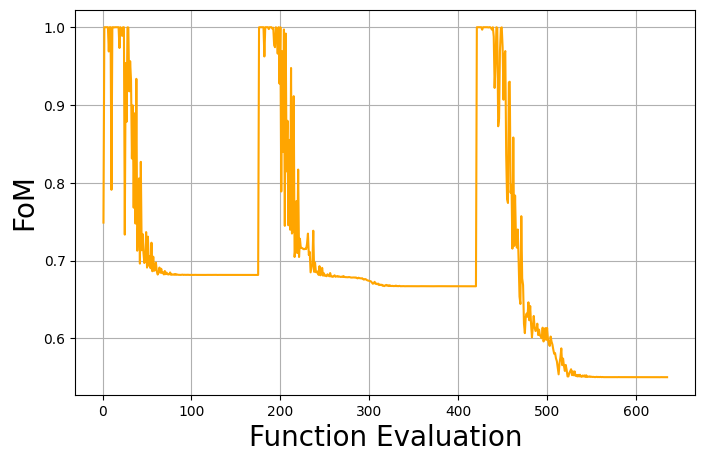

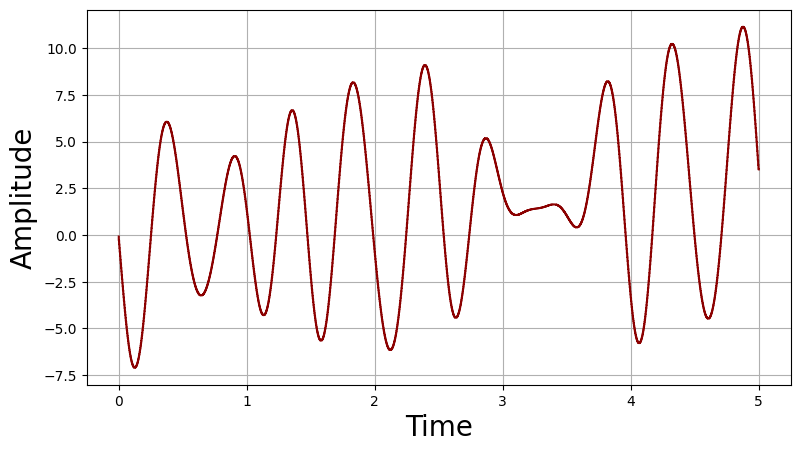

In [70]:
# Get the optimization algorithm object from the optimization object
opt_alg_obj = optimization_obj.get_optimization_algorithm()

# The FoM values for each function evaluation can be found under FoM_list in the optimization algorithm object
fomlist = opt_alg_obj.FoM_list

# Plot the FoM over the number of evaluations
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
iterations = range(1, len(fomlist)+1)
ax.plot(iterations, np.asarray(fomlist), color='orange', linewidth=1.5, zorder=10)
#ax.scatter(iterations, np.asarray(fomlist), color='k', s=15)
#ax.set_yscale("log")
plt.grid(True, which="both")
plt.xlabel('Function Evaluation', fontsize=20)
plt.ylabel('FoM', fontsize=20)

# The optimized controls can be found via the function get_best_controls() called on 
# the optimization algorithm object
controls = opt_alg_obj.get_best_controls()

# it contains the pulses and time grids under certain keys as a dictionary
pulse, timegrid = controls["pulses"][0], controls["timegrids"][0]

# Plot the pulse over time
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
plt.subplots_adjust(bottom=0.15, top=0.9, right=0.98, left=0.1)
plt.step(timegrid, pulse, color='darkred', linewidth=1.5, zorder=10)
plt.grid(True, which="both")
plt.xlabel('Time', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)

In [71]:
pulse

array([-0.07990515, -0.28627087, -0.49341636, ...,  4.01202785,
        3.76380538,  3.51529888])

In [72]:
# SIMULATION PARAMETERS

xmin = -5.0
xmax = 5.0
num_x = 5000
tsim = 10
tc = 10
desired_dt = 0.1
num_t = int(tsim/desired_dt)
num_tc = int(tc/desired_dt)
im_time = False

# Initialize the Param object
par = Param(xmin, xmax, num_x, tsim, num_t, tc, num_tc, im_time)

# ===========================================================================================================

# INITIAL CONDITIONS

res = num_x
omega = 1.0
num_wfcs = 8
T = 1

# Initialize the Operators object
opr = Operators(res, omega, num_wfcs, T, pulse, par)

In [73]:
opr.energies

[0.500000001777339,
 1.5000006247201676,
 2.5000017799451526,
 3.5002243942023266,
 4.500241641984391,
 5.520114879000934,
 6.510235877671374,
 8.193554086575247]

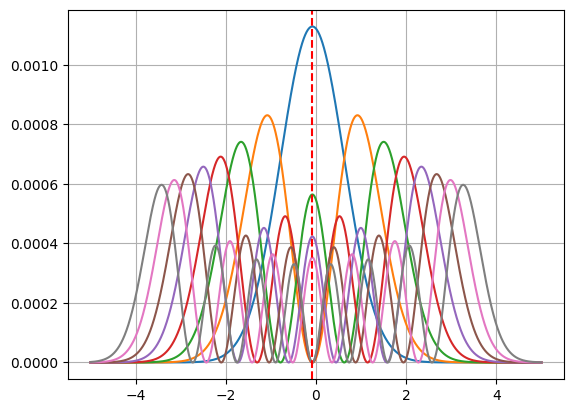

In [75]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[0], color='red', linestyle='--')
plt.xlim(-5.5, 5.5)
plt.grid()
plt.show()

In [76]:
opr.time_evolution(par, fixed_potential=False)

/tmp/ipykernel_9344/2265382712.py:49: RuntimeWarning: invalid value encountered in divide
  probs /= np.sum(probs)


In [77]:
opr.energies

[4231.507241980431,
 4307.732100703824,
 4098.068050837966,
 4530.8411302308095,
 3568.1630455150407,
 3465.397455515303,
 3622.128527539487,
 4441.760049701631]

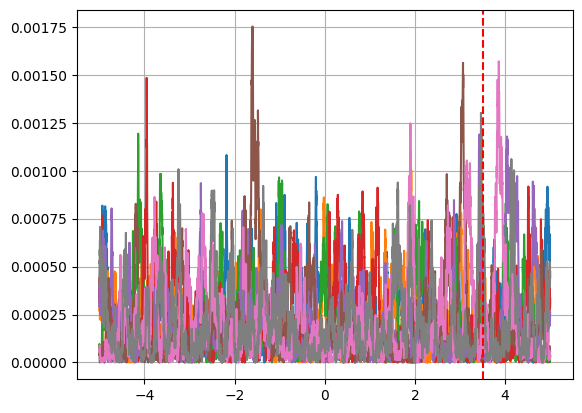

In [79]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.xlim(-5.5, 5.5)
plt.grid()
plt.show()

In [80]:
opr.infidelity()

1.0

In [81]:
opr.time_evolution(par, fixed_potential=True)

/tmp/ipykernel_9344/2265382712.py:49: RuntimeWarning: invalid value encountered in divide
  probs /= np.sum(probs)


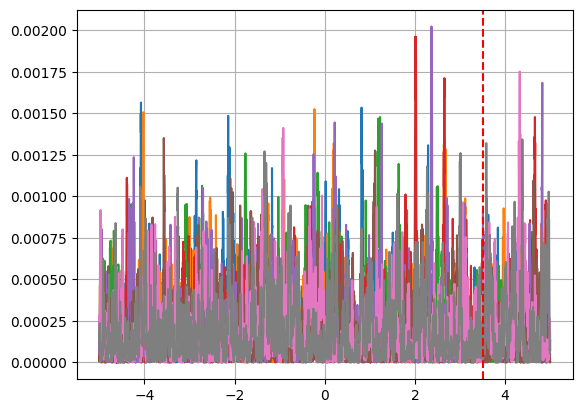

In [82]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.xlim(-5.5, 5.5)
plt.grid()
plt.show()

In [83]:
opr.average_infidelity

1.0

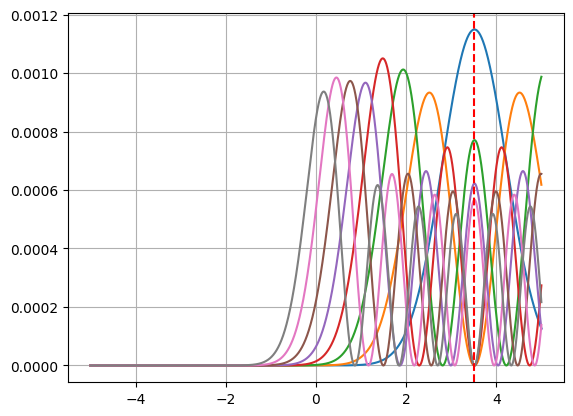

In [84]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.shifted_wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.xlim(-5.5, 5.5)
plt.grid()
plt.show()

# OPTIMIZATION WITH tsim = 20

In [120]:
# SIMULATION PARAMETERS

xmin = -5.0
xmax = 5.0
num_x = 5000
tsim = 20
tc = 10
desired_dt = 0.01
num_t = int(tsim/desired_dt)
num_tc = int(tc/desired_dt)
im_time = False

# Initialize the Param object
par = Param(xmin, xmax, num_x, tsim, num_t, tc, num_tc, im_time)

# ===========================================================================================================

# INITIAL CONDITIONS

res = num_x
omega = 1.0
num_wfcs = 4
T = 1
linear_pulse = lambda t: t / tsim
times = np.linspace(0, tsim, num_t)
pulse = linear_pulse(times)

# Initialize the Operators object
opr = Operators(res, omega, num_wfcs, T, pulse, par)

In [121]:
optimization_dictionary = {"optimization_client_name": "OptimalControldCRAB"}
optimization_dictionary["algorithm_settings"] = { "algorithm_name": "dCRAB"}
optimization_dictionary["algorithm_settings"]["optimization_direction"] = "minimization"
optimization_dictionary["algorithm_settings"]["super_iteration_number"] = 10
optimization_dictionary["algorithm_settings"]["max_eval_total"] = 5000

dsm_settings = {
        "general_settings": {
            "dsm_algorithm_name": "NelderMead",
            "is_adaptive": False
        },
        "stopping_criteria": {
            "xatol": 1e-4,
            "fatol": 1e-6,
            "change_based_stop": {
                "cbs_funct_evals": 200,
                "cbs_change": 0.01
            }
        }
    }
    
optimization_dictionary["algorithm_settings"]["dsm_settings"] = dsm_settings

pulse_x = {"pulse_name": "Pulse_1",
           "upper_limit": 5,
           "lower_limit": -5,
           "bins_number": 2000,
           "amplitude_variation": 0.3,
           "time_name": "time_1"}
           
pulse_x["initial_guess"] = {
               "function_type": "lambda_function",
               "lambda_function": "lambda t: 3 * t / 20"
            }

pulse_x["basis"] = {
                "basis_name": "Fourier",
                "basis_vector_number": 2,
                "random_super_parameter_distribution": {
                    "distribution_name": "Uniform",
                    "lower_limit": 0.1,
                    "upper_limit": 4.0
                },
                "basis_max": 4.0
            }

#pulse_x["basis"] = {"basis_name": "PiecewiseBasis"}

#pulse_x["basis"] = {
#  "basis_name": "Fourier",
#  "basis_vector_number": 5,  # Adjust based on resolution needs
#  "random_super_parameter_distribution": {
#    "distribution_name": "Uniform",
#    "lower_limit": 0.01,
#    "upper_limit": 5.0
#  }
#}


time1 = {"time_name": "time_1",
         "initial_value": 20.0 }

optimization_dictionary["pulses"] = [pulse_x]
optimization_dictionary["parameters"] = []
optimization_dictionary["times"] = [time1]
optimization_dictionary["shaping_options"] = [
            "add_base_pulse",
            "add_new_update_pulse",
            "add_initial_guess",
            "limit_pulse"
        ]


from quocslib.Optimizer import Optimizer
import time

optimization_obj = Optimizer(optimization_dictionary, OptimalControl(opr, par))

time1 = time.time()
optimization_obj.execute()
time2 = time.time()
print("The optimization took {seconds} seconds".format(seconds=time2 - time1))

INFO     oc_logger    The optimization direction is minimization
INFO     oc_logger    QuOCS version number: 0.0.63
INFO     oc_logger    Direct search start time has been reset.


0.01
INFO     oc_logger    New record achieved. Previous FoM: 10000000000, new best FoM : 0.9319217536408171
INFO     oc_logger    Function evaluation number: 1, SI: 1, Sub-iteration number: 0, FoM: 0.9319217536408171
0.01
INFO     oc_logger    New record achieved. Previous FoM: 0.9319217536408171, new best FoM : 0.905224493265742
INFO     oc_logger    Function evaluation number: 2, SI: 1, Sub-iteration number: 0, FoM: 0.905224493265742
0.01
INFO     oc_logger    Function evaluation number: 3, SI: 1, Sub-iteration number: 0, FoM: 0.9129959136978054
0.01
INFO     oc_logger    Function evaluation number: 4, SI: 1, Sub-iteration number: 0, FoM: 0.9490471743909001
0.01
INFO     oc_logger    Function evaluation number: 5, SI: 1, Sub-iteration number: 0, FoM: 0.9121299757624308
0.01
INFO     oc_logger    New record achieved. Previous FoM: 0.905224493265742, new best FoM : 0.8934624067576131
INFO     oc_logger    Function evaluation number: 6, SI: 1, Sub-iteration number: 1, FoM: 0.8934624067

/tmp/ipykernel_20964/2265382712.py:49: RuntimeWarning: invalid value encountered in divide
  probs /= np.sum(probs)


INFO     oc_logger    Function evaluation number: 47, SI: 1, Sub-iteration number: 27, FoM: 1.0
0.01
INFO     oc_logger    Function evaluation number: 48, SI: 1, Sub-iteration number: 27, FoM: 0.7896140445315057
0.01
INFO     oc_logger    Function evaluation number: 49, SI: 1, Sub-iteration number: 28, FoM: 0.7414463300005106
0.01
INFO     oc_logger    Function evaluation number: 50, SI: 1, Sub-iteration number: 29, FoM: 0.7217595947977616
0.01
INFO     oc_logger    Function evaluation number: 51, SI: 1, Sub-iteration number: 30, FoM: 0.9652357727380819
0.01
INFO     oc_logger    Function evaluation number: 52, SI: 1, Sub-iteration number: 30, FoM: 0.708062052610384
0.01
INFO     oc_logger    Function evaluation number: 53, SI: 1, Sub-iteration number: 31, FoM: 0.7758359965628848
0.01
INFO     oc_logger    New record achieved. Previous FoM: 0.6938537748041222, new best FoM : 0.6432408315130123
INFO     oc_logger    Function evaluation number: 54, SI: 1, Sub-iteration number: 31, FoM: 0

Text(0, 0.5, 'Amplitude')

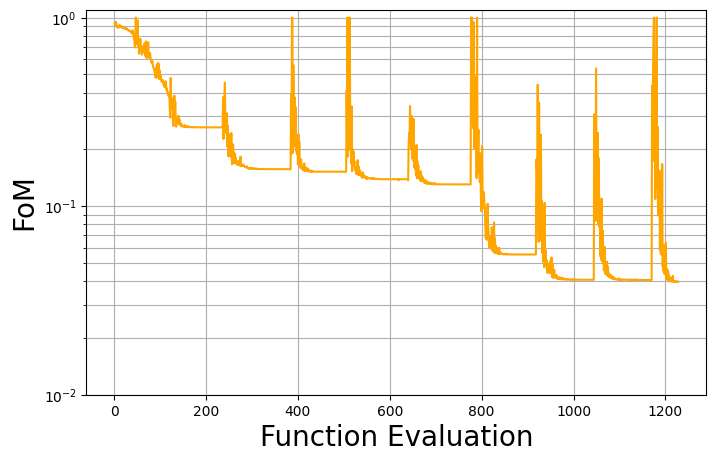

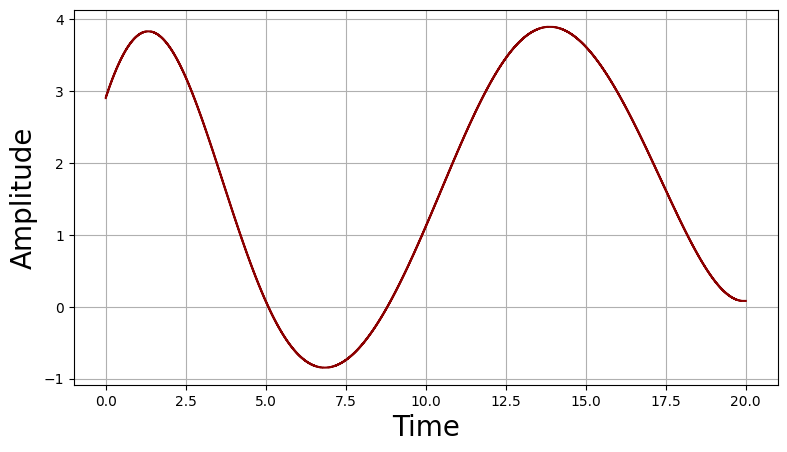

In [141]:
# Get the optimization algorithm object from the optimization object
opt_alg_obj = optimization_obj.get_optimization_algorithm()

# The FoM values for each function evaluation can be found under FoM_list in the optimization algorithm object
fomlist = opt_alg_obj.FoM_list

# Plot the FoM over the number of evaluations
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
iterations = range(1, len(fomlist)+1)
ax.plot(iterations, np.asarray(fomlist), color='orange', linewidth=1.5, zorder=10)
#ax.scatter(iterations, np.asarray(fomlist), color='k', s=15)
ax.set_yscale("log")
plt.ylim(0.01, 1.1)
plt.grid(True, which="both")
plt.xlabel('Function Evaluation', fontsize=20)
plt.ylabel('FoM', fontsize=20)

# The optimized controls can be found via the function get_best_controls() called on 
# the optimization algorithm object
controls = opt_alg_obj.get_best_controls()

# it contains the pulses and time grids under certain keys as a dictionary
pulse, timegrid = controls["pulses"][0], controls["timegrids"][0]

# Plot the pulse over time
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
plt.subplots_adjust(bottom=0.15, top=0.9, right=0.98, left=0.1)
plt.step(timegrid, pulse, color='darkred', linewidth=1.5, zorder=10)
plt.grid(True, which="both")
plt.xlabel('Time', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)

In [123]:
pulse

array([2.90320267, 2.91667283, 2.9300569 , ..., 0.08037398, 0.0806865 ,
       0.08107558])

In [ ]:
# SIMULATION PARAMETERS

xmin = -5.0
xmax = 5.0
num_x = 5000
tsim = 20
tc = 10
desired_dt = 0.01
num_t = int(tsim/desired_dt)
num_tc = int(tc/desired_dt)
im_time = False

# Initialize the Param object
par = Param(xmin, xmax, num_x, tsim, num_t, tc, num_tc, im_time)

# ===========================================================================================================

# INITIAL CONDITIONS

res = num_x
omega = 1.0
num_wfcs = 4
T = 1

# Initialize the Operators object
opr = Operators(res, omega, num_wfcs, T, pulse, par)

In [130]:
opr.energies

[2.912544997058272, 23.028033382936954, 81.39925329649593, 148.4327775794409]

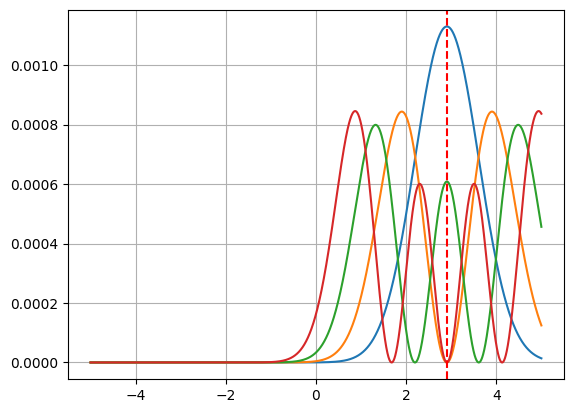

In [131]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[0], color='red', linestyle='--')
plt.xlim(-5.5, 5.5)
plt.grid()
plt.show()

In [132]:
opr.time_evolution(par, fixed_potential=False)

In [133]:
opr.energies

[436.44669512804677, 636.7648183381154, 1226.599298950157, 1594.7965696443507]

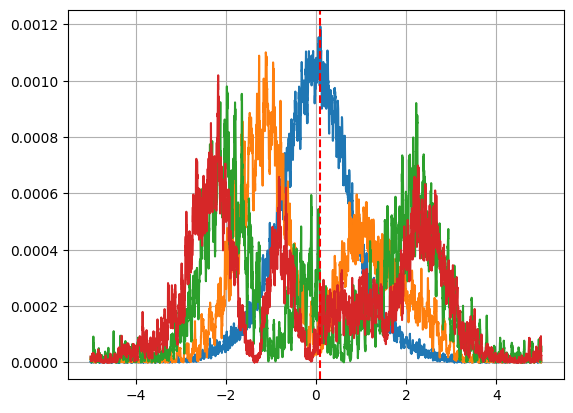

In [134]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.xlim(-5.5, 5.5)
plt.grid()
plt.show()

In [135]:
opr.infidelity()

0.03756132133022108458

In [136]:
opr.time_evolution(par, fixed_potential=True)

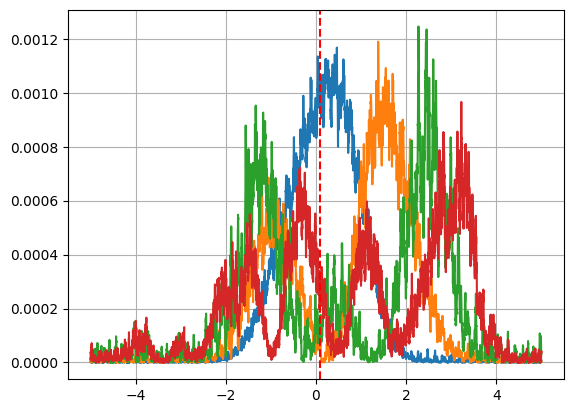

In [137]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.xlim(-5.5, 5.5)
plt.grid()
plt.show()

In [138]:
opr.average_infidelity

0.039611237236888181645

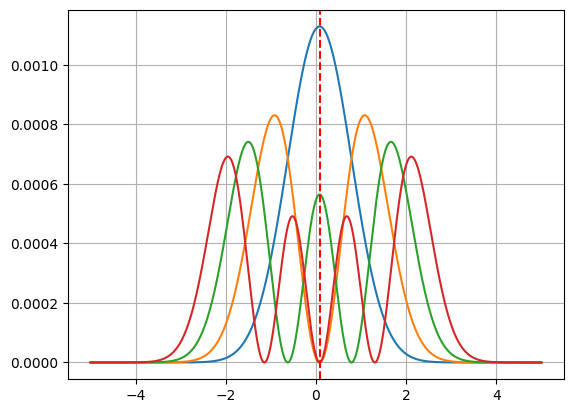

In [139]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.shifted_wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.xlim(-5.5, 5.5)
plt.grid()
plt.show()

# Simulation with Sigmoid

In [230]:
# SIMULATION PARAMETERS

xmin = -4.0
xmax = 7.0
num_x = 5500
tsim = 15
tc = 10
desired_dt = 0.1
num_t = int(tsim/desired_dt)
num_tc = int(tc/desired_dt)
im_time = False

# Initialize the Param object
par = Param(xmin, xmax, num_x, tsim, num_t, tc, num_tc, im_time)

# ===========================================================================================================

# INITIAL CONDITIONS

res = num_x
omega = 1.0
num_wfcs = 4
T = 1
linear_pulse = lambda t: t / tsim
times = np.linspace(0, tsim, num_t)
pulse = linear_pulse(times)

# Initialize the Operators object
opr = Operators(res, omega, num_wfcs, T, pulse, par)

In [231]:
optimization_dictionary = {"optimization_client_name": "OptimalControldCRAB"}
optimization_dictionary["algorithm_settings"] = { "algorithm_name": "dCRAB"}
optimization_dictionary["algorithm_settings"]["optimization_direction"] = "minimization"
optimization_dictionary["algorithm_settings"]["super_iteration_number"] = 10
optimization_dictionary["algorithm_settings"]["max_eval_total"] = 5000

dsm_settings = {
        "general_settings": {
            "dsm_algorithm_name": "NelderMead",
            "is_adaptive": False
        },
        "stopping_criteria": {
            "xatol": 1e-4,
            "fatol": 1e-6,
            "change_based_stop": {
                "cbs_funct_evals": 200,
                "cbs_change": 0.01
            }
        }
    }
    
optimization_dictionary["algorithm_settings"]["dsm_settings"] = dsm_settings

#optimization_dictionary["algorithm_settings"]["constraint_handling"] = {
#    "method": "hard",
#    "initial_value": 0,
#    "final_value": 3
#}

pulse_x = {"pulse_name": "Pulse_1",
           "upper_limit": 3,
           "lower_limit": 0,
           "bins_number": num_t,
           "amplitude_variation": 1,
           "time_name": "time_1"}

#pulse_x["scaling_function"] = {
#    "function_type": "lambda_function",
#    "lambda_function": "lambda t: 3 * t / 10"  # Ensures pulse starts at 0 and ends at 3
#}

pulse_x["scaling_function"] = {
    "function_type": "lambda_function",
    "lambda_function": "lambda t: 3 * (t / 15)"  # Starts at 0, ends at 3
}

pulse_x["initial_guess"] = {
    "function_type": "lambda_function",
    "lambda_function": "lambda t:  3 * t / 15"
}

#pulse_x["scaling_function"] = {
#            "function_type": "python_file",
#            "file_path": "functions.py",
#            "function_name": "shape_function",
#            "path_mode": "relative"
#        }

#pulse_x["basis"] = {
#                "basis_name": "Fourier",
#                "basis_vector_number": 4,
#                "random_super_parameter_distribution": {
#                    "distribution_name": "Uniform",
#                    "lower_limit": 0.1,
#                    "upper_limit": 4.0
#                },
#            }

#pulse_x["basis"] = {"basis_name": "PiecewiseBasis"}

pulse_x["basis"] = {
  "basis_name": "Fourier",
  "basis_vector_number": 4,  # Adjust based on resolution needs
  "random_super_parameter_distribution": {
    "distribution_name": "Uniform",
    "lower_limit": 0.1,
    "upper_limit": 4.0
  },
  #"basis_max": 3.0
}


time1 = {"time_name": "time_1",
         "initial_value": tsim }

optimization_dictionary["pulses"] = [pulse_x]
optimization_dictionary["parameters"] = []
optimization_dictionary["times"] = [time1]
#optimization_dictionary["shaping_options"] = [
#            "add_base_pulse",
#            "add_new_update_pulse",
#            "scale_pulse",
#            "add_initial_guess",
#            "limit_pulse"
#        ]


from quocslib.Optimizer import Optimizer
import time

optimization_obj = Optimizer(optimization_dictionary, OptimalControl(opr, par))

time1 = time.time()
optimization_obj.execute()
time2 = time.time()
print("The optimization took {seconds} seconds".format(seconds=time2 - time1))

INFO     oc_logger    The optimization direction is minimization
INFO     oc_logger    QuOCS version number: 0.0.63
INFO     oc_logger    Direct search start time has been reset.
[0.9203802050422737, 6.0793487152576855, 31.672671253497064, 148.39331937813955]
INFO     oc_logger    New record achieved. Previous FoM: 10000000000, new best FoM : 0.3112284119189457
INFO     oc_logger    Function evaluation number: 1, SI: 1, Sub-iteration number: 0, FoM: 0.3112284119189457
[8.072400971066509, 73.07899022025471, 366.65957747324234, 1075.7620408496898]
INFO     oc_logger    Function evaluation number: 2, SI: 1, Sub-iteration number: 0, FoM: 0.6674995325613243
[11.128461432835035, 102.90647759907084, 484.0896772123363, 1183.0872900005359]
INFO     oc_logger    Function evaluation number: 3, SI: 1, Sub-iteration number: 0, FoM: 0.662042861424032
[403.0503229925748, 1469.9632616138224, 2358.939734839107, 3314.1443358841766]
INFO     oc_logger    Function evaluation number: 4, SI: 1, Sub-iteratio

/tmp/ipykernel_442/2718060526.py:51: RuntimeWarning: invalid value encountered in divide
  probs /= np.sum(probs)
/tmp/ipykernel_442/2718060526.py:23: RuntimeWarning: invalid value encountered in divide
  rho /= np.trace(rho)


[1601.8440030401039, 2977.3076679810138, 4109.522956600147, 4746.828410072531]
INFO     oc_logger    Function evaluation number: 11, SI: 1, Sub-iteration number: 2, FoM: 0.9777776306967109
[34.69227604997007, 277.13750205753206, 958.6672049048354, 1759.8124448210106]
INFO     oc_logger    Function evaluation number: 12, SI: 1, Sub-iteration number: 2, FoM: 0.7403282816054407
[24.519736811513724, 207.50930075958595, 814.6451507227879, 1730.9803078690622]
INFO     oc_logger    Function evaluation number: 13, SI: 1, Sub-iteration number: 3, FoM: 0.7168679436910038
[2184.57208253953, 3782.6801008897583, 4221.600692198051, 4932.389769190134]
INFO     oc_logger    Function evaluation number: 14, SI: 1, Sub-iteration number: 4, FoM: 1.0
[10.27725827807916, 94.26192755975762, 456.6115012420468, 1154.1995852800462]
INFO     oc_logger    Function evaluation number: 15, SI: 1, Sub-iteration number: 4, FoM: 0.6552703603337338
[64.33820244358985, 465.5074708973696, 1298.1066798198692, 2025.45617000

Text(0, 0.5, 'Amplitude')

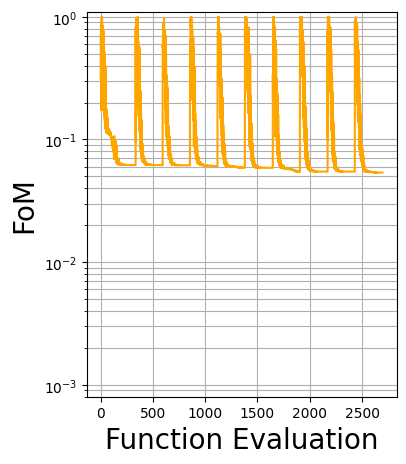

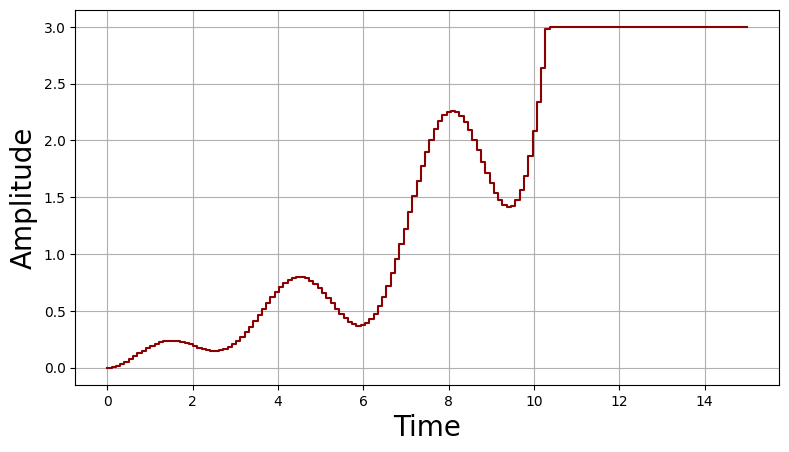

In [232]:
# Get the optimization algorithm object from the optimization object
opt_alg_obj = optimization_obj.get_optimization_algorithm()

# The FoM values for each function evaluation can be found under FoM_list in the optimization algorithm object
fomlist = opt_alg_obj.FoM_list

# Plot the FoM over the number of evaluations
fig = plt.figure(figsize=(4, 5))
ax = fig.add_subplot(111)
iterations = range(1, len(fomlist)+1)
ax.plot(iterations, np.asarray(fomlist), color='orange', linewidth=1.5, zorder=10)
#ax.scatter(iterations, np.asarray(fomlist), color='k', s=15)
ax.set_yscale("log")
plt.ylim(0.0008, 1.1)
plt.grid(True, which="both")
plt.xlabel('Function Evaluation', fontsize=20)
plt.ylabel('FoM', fontsize=20)

# The optimized controls can be found via the function get_best_controls() called on 
# the optimization algorithm object
controls = opt_alg_obj.get_best_controls()

# it contains the pulses and time grids under certain keys as a dictionary
pulse, timegrid = controls["pulses"][0], controls["timegrids"][0]

# Plot the pulse over time
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
plt.subplots_adjust(bottom=0.15, top=0.9, right=0.98, left=0.1)
plt.step(timegrid, pulse, color='darkred', linewidth=1.5, zorder=10)
plt.grid(True, which="both")
plt.xlabel('Time', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)

In [233]:
pulse

array([0.        , 0.        , 0.00393059, 0.01503177, 0.03118473,
       0.05140283, 0.07458439, 0.09955986, 0.12514101, 0.15017011,
       0.1735674 , 0.19437494, 0.21179526, 0.22522332, 0.23427062,
       0.23878049, 0.2388341 , 0.23474682, 0.22705515, 0.21649462,
       0.20396957, 0.19051579, 0.17725753, 0.16536037, 0.15598178,
       0.1502213 , 0.14907205, 0.15337567, 0.16378229, 0.18071728,
       0.20435599, 0.23460785, 0.27111034, 0.31323345, 0.36009472,
       0.4105844 , 0.46340021, 0.51709056, 0.57010489, 0.62084945,
       0.66774671, 0.70929624, 0.74413495, 0.7710945 , 0.7892537 ,
       0.79798388, 0.79698544, 0.78631387, 0.76639418, 0.73802261,
       0.70235543, 0.66088447, 0.61540008, 0.56794211, 0.52074047,
       0.47614666, 0.43655854, 0.4043405 , 0.38174168, 0.37081491,
       0.37333906, 0.39074762, 0.42406611, 0.47386059, 0.5401996 ,
       0.62263107, 0.72017566, 0.83133721, 0.95413072, 1.08612751,
       1.22451677, 1.36618207, 1.50779102, 1.64589558, 1.77704

In [234]:
# SIMULATION PARAMETERS

# Initialize the Param object
par = Param(xmin, xmax, num_x, tsim, num_t, tc, num_tc, im_time)

# ===========================================================================================================

# INITIAL CONDITIONS

# Initialize the Operators object
opr = Operators(res, omega, num_wfcs, T, pulse, par)

In [235]:
opr.energies

[0.5000220042086041, 1.5007041356954813, 2.510573080636324, 3.5987007104768596]

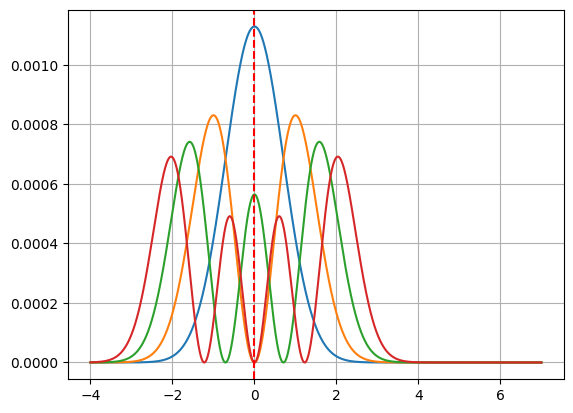

In [236]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[0], color='red', linestyle='--')
plt.grid()
plt.show()

In [237]:
opr.time_evolution(par, fixed_potential=False)

In [238]:
opr.energies

[0.5032852641374118,
 1.5726039005344024,
 2.9086693170479703,
 14.026495674755287]

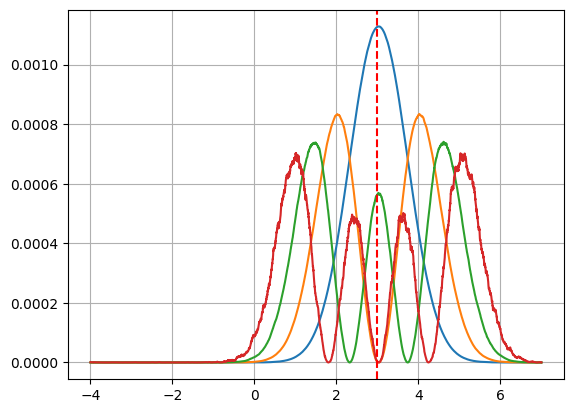

In [239]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.grid()
plt.show()

In [240]:
opr.infidelity()

0.031012629168228784255

In [241]:
opr.time_evolution(par, fixed_potential=True)

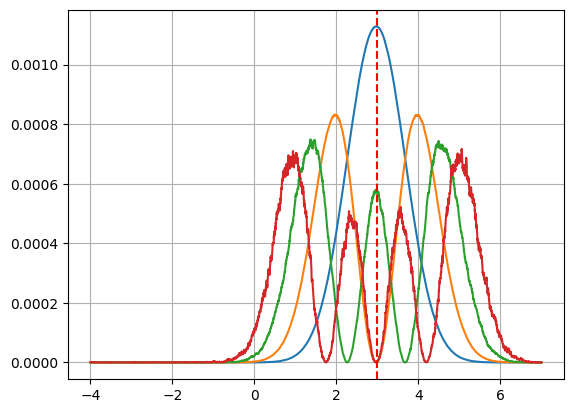

In [242]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.grid()
plt.show()

In [243]:
opr.energies

[0.5076101729772395, 1.665376796150539, 6.922899099849376, 29.560389442955238]

In [244]:
opr.average_infidelity

0.05366062348972482329

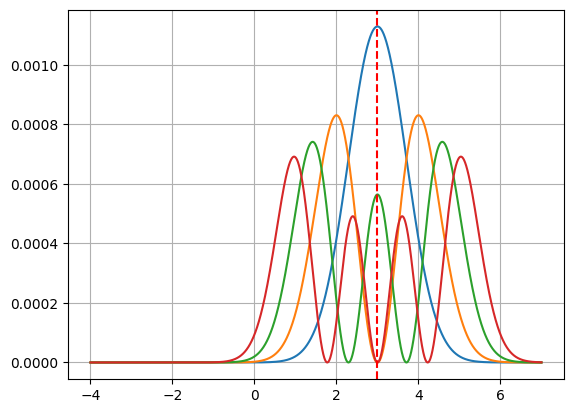

In [245]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.shifted_wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.grid()
plt.show()

# SIGMOID AS INITAL GUESS

In [10]:
# SIMULATION PARAMETERS

xmin = -20.0
xmax = 20.0
num_x = 4000
tsim = 9
tc = 10
desired_dt = 0.1
num_t = int(tsim/desired_dt)
num_tc = int(tc/desired_dt)
im_time = False

# Initialize the Param object
par = Param(xmin, xmax, num_x, tsim, num_t, tc, num_tc, im_time)

# ===========================================================================================================

# INITIAL CONDITIONS -> ADD WFC OFFSET

res = num_x
omega = 1.0
num_wfcs = 8
T = 1
linear_pulse = lambda t: t
times = np.linspace(0, tsim/2, num_t) - tsim/4
pulse = linear_pulse(times)

# Initialize the Operators object
opr = Operators(res, omega, num_wfcs, T, pulse, par)

In [11]:
optimization_dictionary = {"optimization_client_name": "OptimalControldCRAB"}
optimization_dictionary["algorithm_settings"] = { "algorithm_name": "dCRAB"}
optimization_dictionary["algorithm_settings"]["optimization_direction"] = "minimization"
optimization_dictionary["algorithm_settings"]["super_iteration_number"] = 10
optimization_dictionary["algorithm_settings"]["max_eval_total"] = 5000

dsm_settings = {
        "general_settings": {
            "dsm_algorithm_name": "NelderMead",
            "is_adaptive": False
        },
        "stopping_criteria": {
            "xatol": 1e-4,
            "fatol": 1e-6,
            "change_based_stop": {
                "cbs_funct_evals": 200,
                "cbs_change": 0.01
            }
        }
    }
    
optimization_dictionary["algorithm_settings"]["dsm_settings"] = dsm_settings

#optimization_dictionary["algorithm_settings"]["constraint_handling"] = {
#    "method": "hard",
#    "initial_value": 0,
#    "final_value": 3
#}

pulse_x = {"pulse_name": "Pulse_1",
           "upper_limit": 5,
           "lower_limit": -5,
           "bins_number": num_t,
           "amplitude_variation": 3,
           "time_name": "time_1"}

#pulse_x["scaling_function"] = {
#    "function_type": "lambda_function",
#    "lambda_function": "lambda t: 3 * t / 10"  # Ensures pulse starts at 0 and ends at 3
#}

#pulse_x["scaling_function"] = {
#    "function_type": "lambda_function",
#    "lambda_function": "lambda t: 10 * (1 / (1 + np.exp(-(t / 2))) - 0.5)"  # Starts at 0, ends at 3
#}

pulse_x["initial_guess"] = {
    "function_type": "lambda_function",
    "lambda_function": "lambda t: 5 * (1 / (1 + np.exp(-(t / 2))) - 0.5)"
}

#pulse_x["scaling_function"] = {
#            "function_type": "python_file",
#            "file_path": "functions.py",
#            "function_name": "shape_function",
#            "path_mode": "relative"
#        }

#pulse_x["basis"] = {
#                "basis_name": "Fourier",
#                "basis_vector_number": 4,
#                "random_super_parameter_distribution": {
#                    "distribution_name": "Uniform",
#                    "lower_limit": 0.1,
#                    "upper_limit": 4.0
#                },
#            }

#pulse_x["basis"] = {"basis_name": "PiecewiseBasis"}

pulse_x["basis"] = {
  "basis_name": "Sinc",
  "basis_vector_number": 8,  # Adjust based on resolution needs
  "random_super_parameter_distribution": {
    "distribution_name": "Uniform",
    "lower_limit": 0.1,
    "upper_limit": 4.0
  },
  "basis_max": 4.0
}


time1 = {"time_name": "time_1",
         "initial_value": tsim }

optimization_dictionary["pulses"] = [pulse_x]
optimization_dictionary["parameters"] = []
optimization_dictionary["times"] = [time1]
#optimization_dictionary["shaping_options"] = [
#            "add_base_pulse",
#            "add_new_update_pulse",
#            "scale_pulse",
#            "add_initial_guess",
#            "limit_pulse"
#        ]


from quocslib.Optimizer import Optimizer
import time

optimization_obj = Optimizer(optimization_dictionary, OptimalControl(opr, par))

time1 = time.time()
optimization_obj.execute()
time2 = time.time()
print("The optimization took {seconds} seconds".format(seconds=time2 - time1))

INFO     oc_logger    The optimization direction is minimization
INFO     oc_logger    QuOCS version number: 0.0.63
INFO     oc_logger    Direct search start time has been reset.
[0.7880966821955051, 1.7880967601152034, 2.7880968380348983, 3.7880969159546014, 4.788096993874285, 5.788097071794001, 6.788097149713713, 7.788097227633406]
INFO     oc_logger    New record achieved. Previous FoM: 10000000000, new best FoM : 0.12392031310461862
INFO     oc_logger    Function evaluation number: 1, SI: 1, Sub-iteration number: 0, FoM: 0.12392031310461862
[1.2919766800177734, 2.291976757937469, 3.291976835857169, 4.291976913776866, 5.29197699169658, 6.291977069616277, 7.291977147535981, 8.291977225455692]
INFO     oc_logger    Function evaluation number: 2, SI: 1, Sub-iteration number: 0, FoM: 0.30303438116502457
[0.8584490320406438, 1.8584491099603495, 2.8584491878800518, 3.858449265799752, 4.8584493437194505, 5.858449421639136, 6.858449499558854, 7.858449577478557]
INFO     oc_logger    Functio

Text(0, 0.5, 'Amplitude')

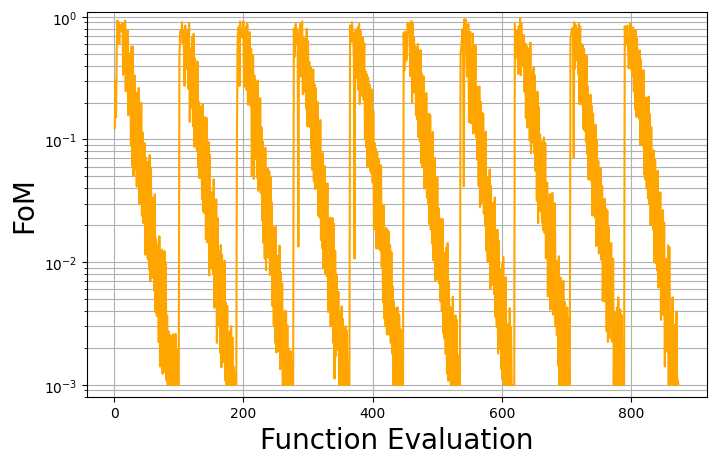

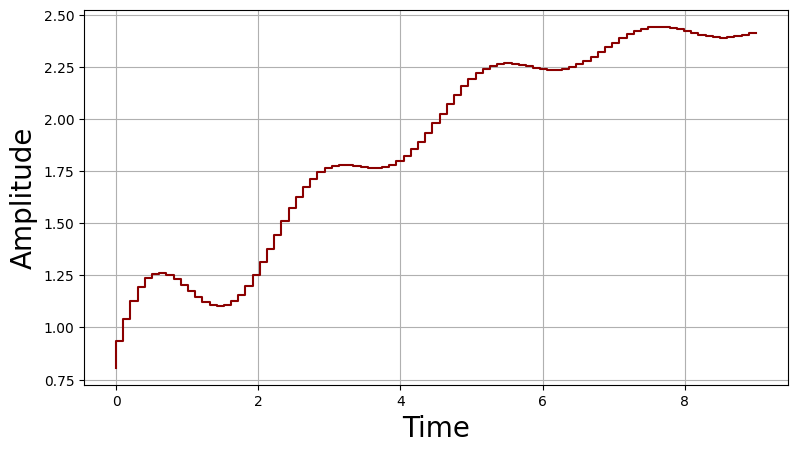

In [12]:
# Get the optimization algorithm object from the optimization object
opt_alg_obj = optimization_obj.get_optimization_algorithm()

# The FoM values for each function evaluation can be found under FoM_list in the optimization algorithm object
fomlist = opt_alg_obj.FoM_list

# Plot the FoM over the number of evaluations
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
iterations = range(1, len(fomlist)+1)
ax.plot(iterations, np.asarray(fomlist), color='orange', linewidth=1.5, zorder=10)
#ax.scatter(iterations, np.asarray(fomlist), color='k', s=15)
ax.set_yscale("log")
plt.ylim(0.0008, 1.1)
plt.grid(True, which="both")
plt.xlabel('Function Evaluation', fontsize=20)
plt.ylabel('FoM', fontsize=20)

# The optimized controls can be found via the function get_best_controls() called on 
# the optimization algorithm object
controls = opt_alg_obj.get_best_controls()

# it contains the pulses and time grids under certain keys as a dictionary
pulse, timegrid = controls["pulses"][0], controls["timegrids"][0]

# Plot the pulse over time
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
plt.subplots_adjust(bottom=0.15, top=0.9, right=0.98, left=0.1)
plt.step(timegrid, pulse, color='darkred', linewidth=1.5, zorder=10)
plt.grid(True, which="both")
plt.xlabel('Time', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)

In [89]:
# SIMULATION PARAMETERS

# Initialize the Param object
par = Param(xmin, xmax, num_x, tsim, num_t, tc, num_tc, im_time)

# ===========================================================================================================

# INITIAL CONDITIONS

# Initialize the Operators object
opr = Operators(res, omega, num_wfcs, T, pulse, par)

In [90]:
opr.energies

[0.5,
 1.499999999999998,
 2.499999999999997,
 3.4999999999999982,
 4.499999999999994,
 5.5,
 6.500000000000002,
 7.500000000000012]

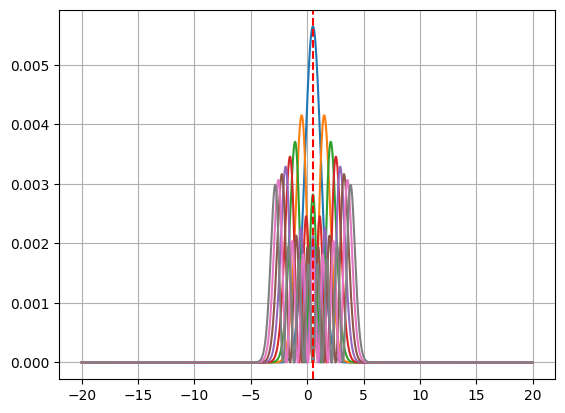

In [91]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[0], color='red', linestyle='--')
plt.grid()
plt.show()

In [92]:
opr.time_evolution(par, fixed_potential=False)

In [93]:
opr.energies

[0.5188209127016941,
 1.5188218518440906,
 2.5188227909864733,
 3.5188237301288674,
 4.51882466927127,
 5.518825608413657,
 6.518826547556048,
 7.51882748669845]

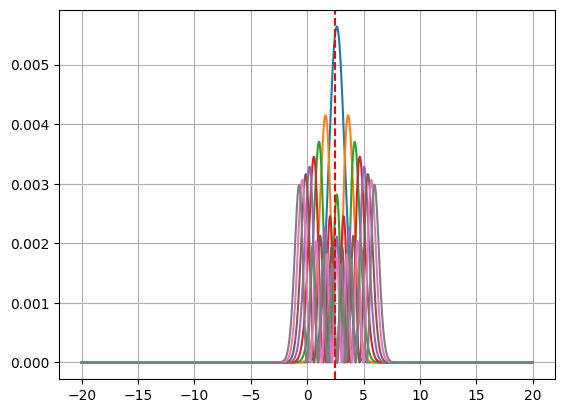

In [94]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.grid()
plt.show()

In [95]:
opr.infidelity()

0.0010000000000000000208

In [96]:
opr.time_evolution(par, fixed_potential=True)

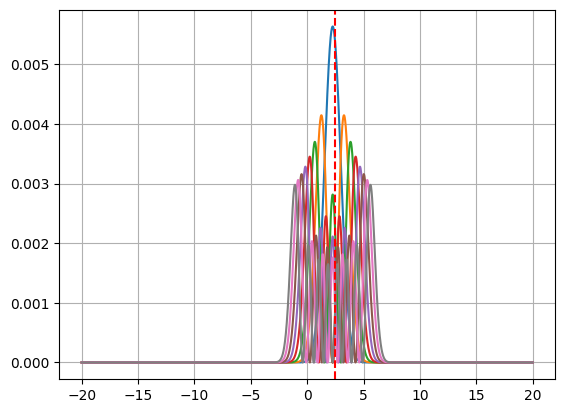

In [97]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.grid()
plt.show()

In [98]:
opr.energies

[0.5188136111957814,
 1.5188162416425284,
 2.518818872089262,
 3.518821502535989,
 4.518824132982732,
 5.518826763429474,
 6.518829393876213,
 7.5188320243229425]

In [99]:
opr.average_infidelity

0.0010000000000000000208

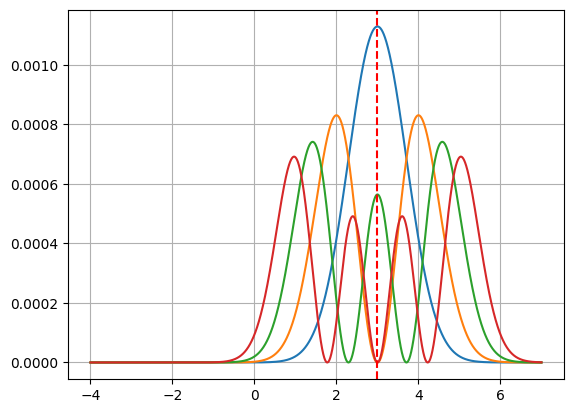

In [263]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.shifted_wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.grid()
plt.show()